In [1]:
import pandas as pd
import time

from Q_A.QA_Classifier import Classifier_QA
from Q_A.ModelMetrics import ModelMetrics

In [2]:
results_df = pd.DataFrame(columns=["model_name", "elapsed_time", "accuracy", "precision", "recall", "f1_score"])

# Different models to try out.
models = ['deepseek-r1:1.5b', 'deepseek-r1:7b', 'deepseek-r1:8b', 'deepseek-r1:14b', 'deepseek-r1:32b',
          'llama3:8b', 
          'llama3.1:8b', 
          'llama3.2:1b', 'llama3.2:3b',
          'phi3:3.8b', 'phi3:14b',
          'phi4',
          'qwen2:0.5b', 'qwen2:1.5b', 'qwen2:7b',
          'qwen2.5:0.5b', 'qwen2.5:1.5b', 'qwen2.5:3b', 'qwen2.5:7b', 'qwen2.5:14b', #'qwen2.5:32b' # No space left on the device
          'gemma:2b', 'gemma:7b',
          'gemma2:2b', 'gemma2:9b',
          'mistral']

# Labeled dataset
labeled_data = "/home/aacastro/Alejandro/ACA_MultichanelAI_2025/src/TEXT/label_data/labeled_gold_sample_QA.csv"

ELAPSED TIME CLASSIFYING FOR MODEL deepseek-r1:1.5b is 44.39


/mnt/sdb1/home/aacastro/Alejandro/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/sdb1/home/aacastro/Alejandro/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/sdb1/home/aacastro/Alejandro/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

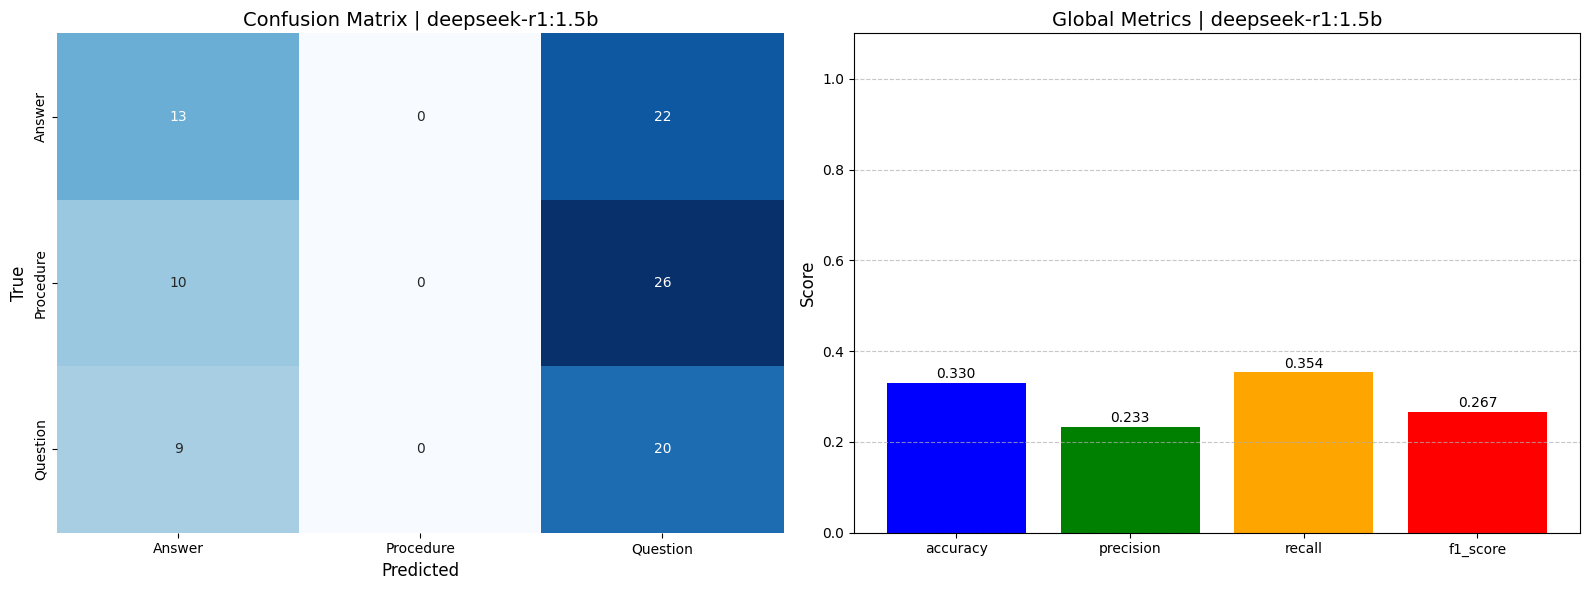

/mnt/sdb1/home/aacastro/Alejandro/ACA_MultichanelAI_2025/src/TEXT/ipykernel_1226677/4252282830.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([row_data])], ignore_index=True)


ELAPSED TIME CLASSIFYING FOR MODEL deepseek-r1:7b is 44.34


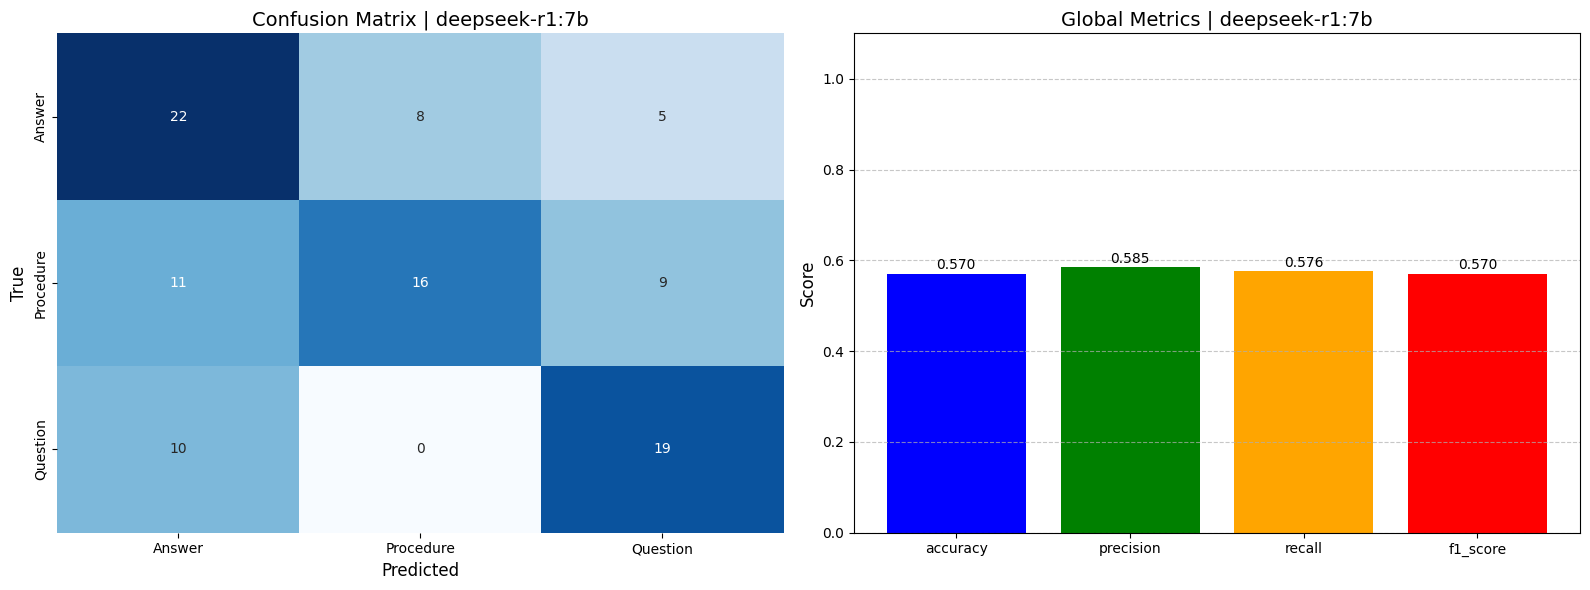

ELAPSED TIME CLASSIFYING FOR MODEL deepseek-r1:8b is 43.63


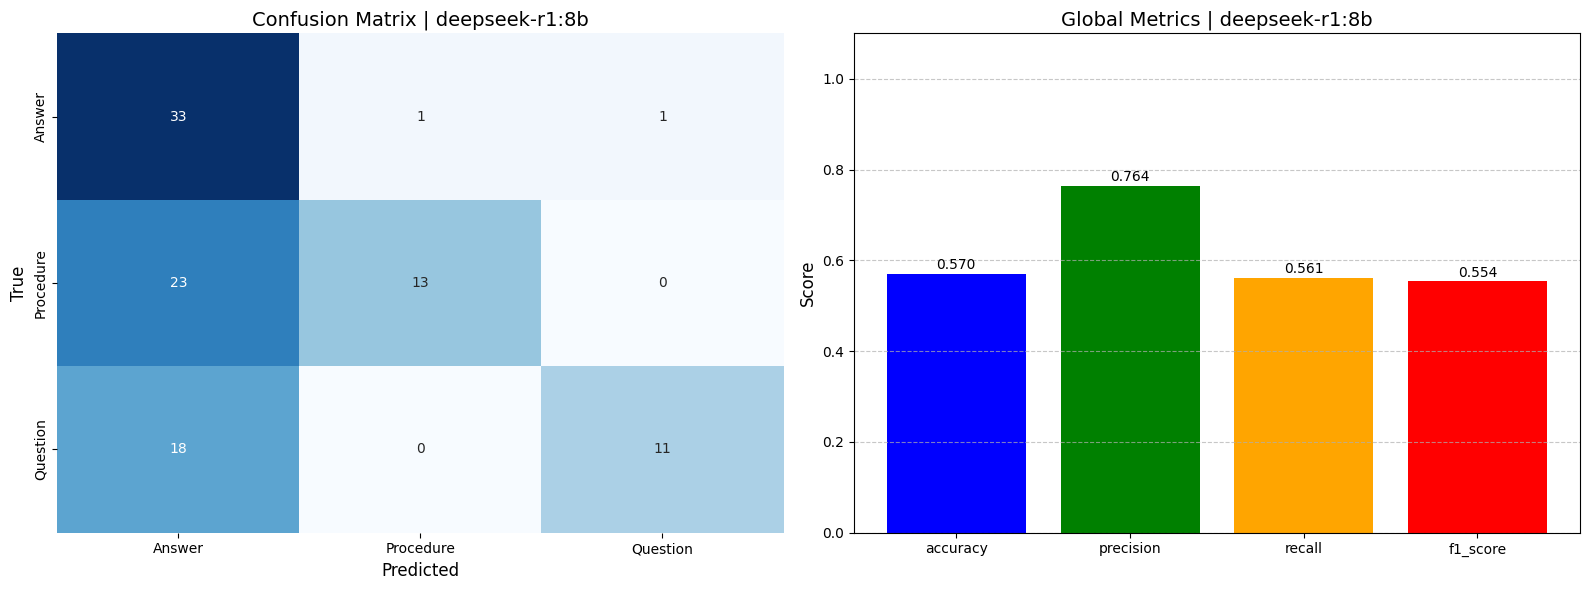

ELAPSED TIME CLASSIFYING FOR MODEL deepseek-r1:14b is 65.15


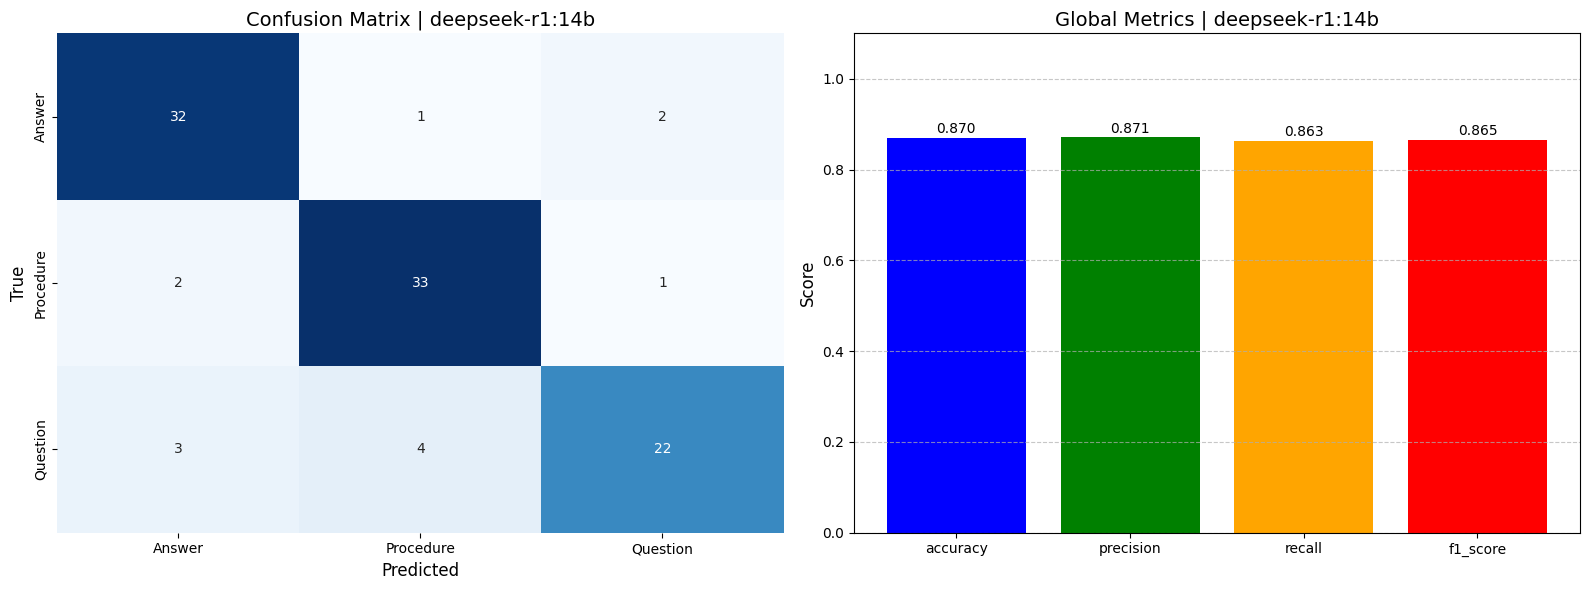

ELAPSED TIME CLASSIFYING FOR MODEL deepseek-r1:32b is 111.76


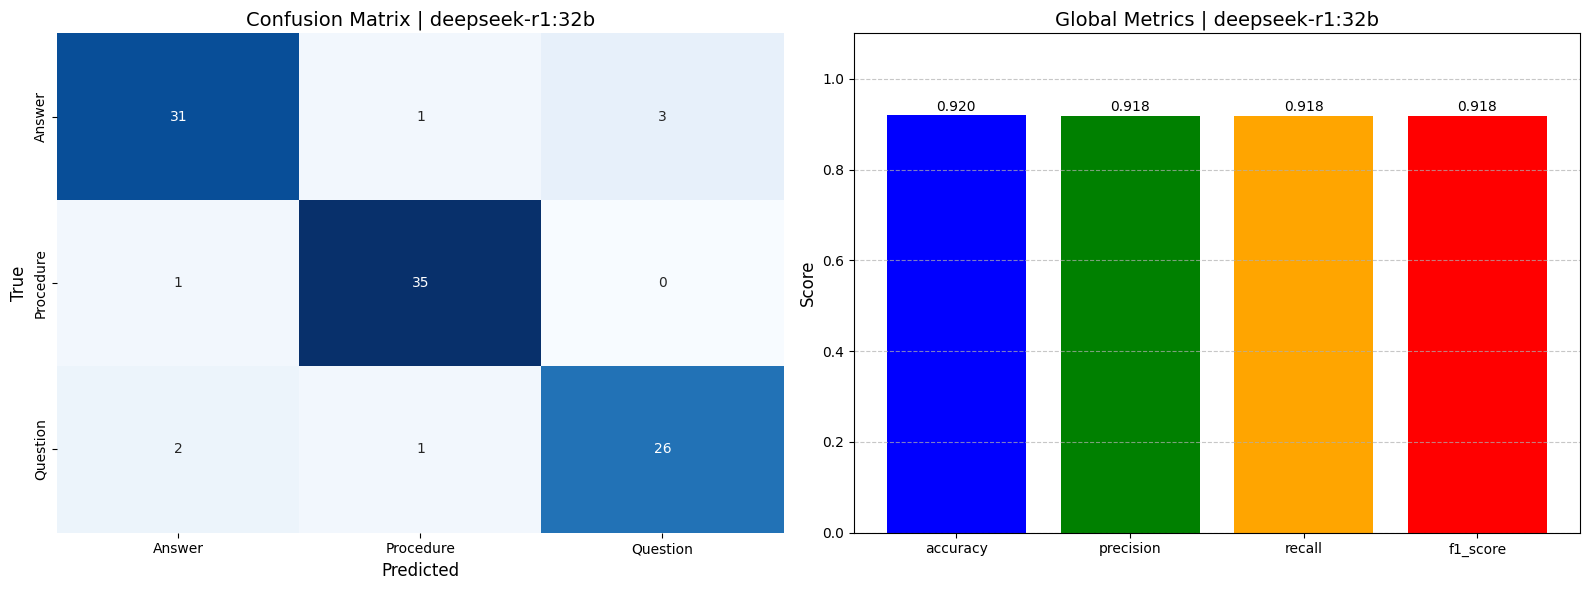

ELAPSED TIME CLASSIFYING FOR MODEL llama3:8b is 30.18


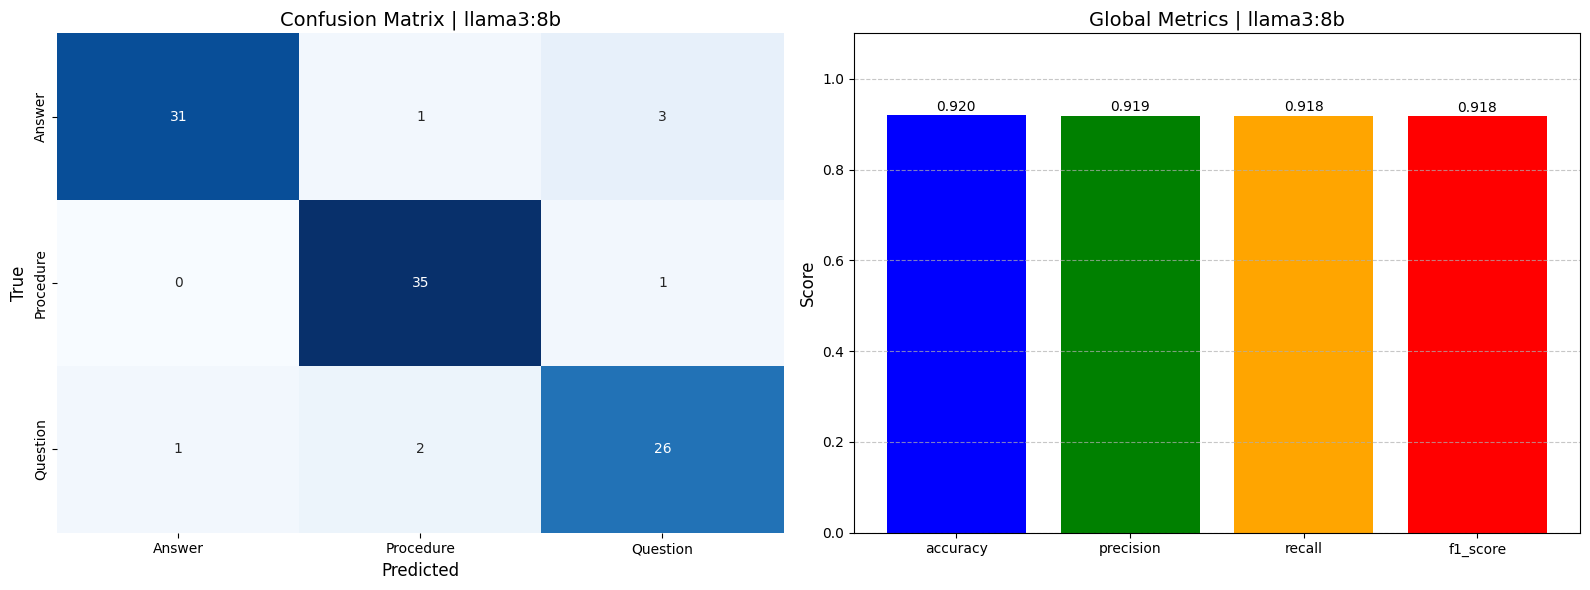

ELAPSED TIME CLASSIFYING FOR MODEL llama3.1:8b is 25.19


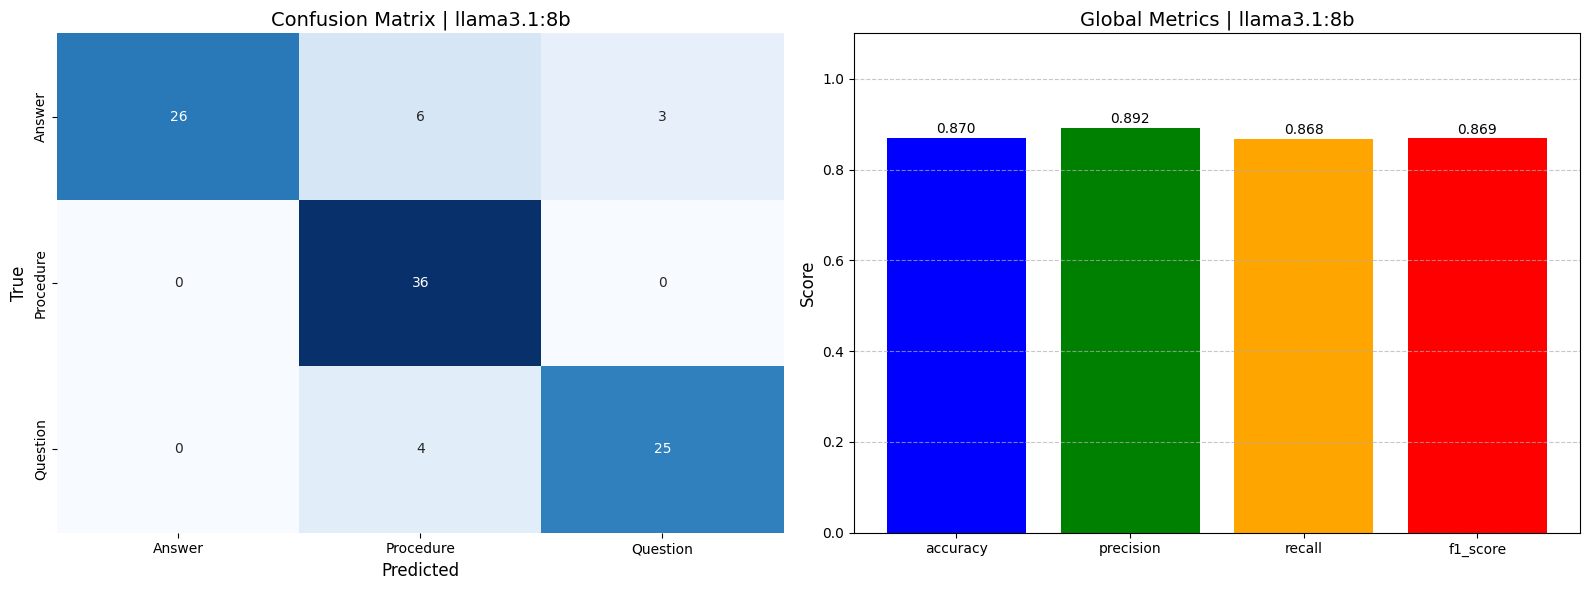

ELAPSED TIME CLASSIFYING FOR MODEL llama3.2:1b is 26.89


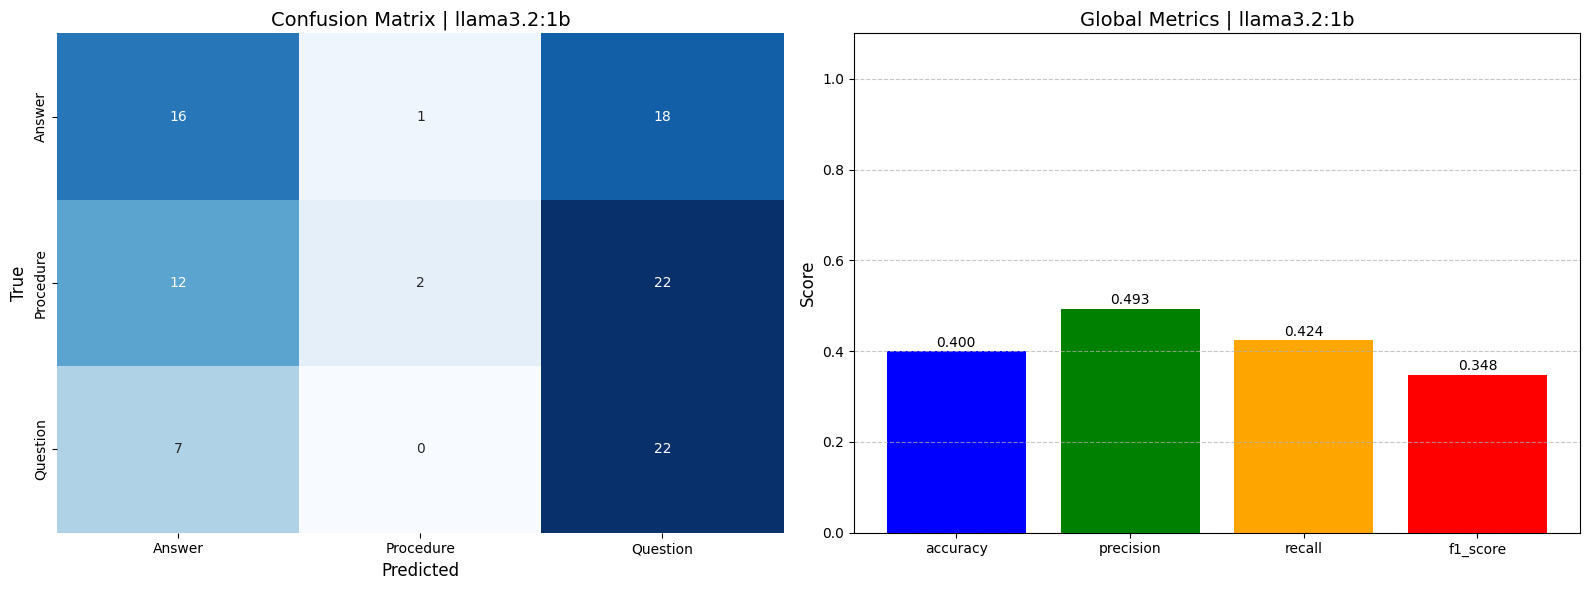

ELAPSED TIME CLASSIFYING FOR MODEL llama3.2:3b is 20.34


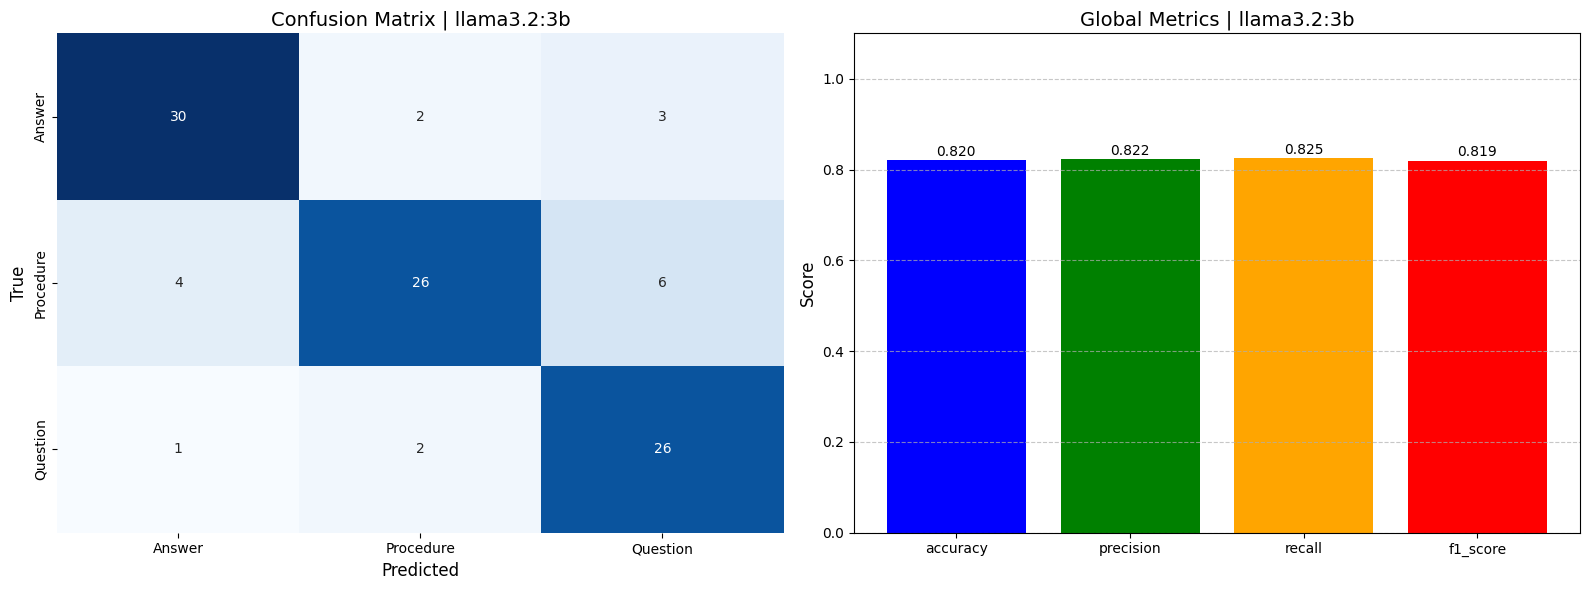

ELAPSED TIME CLASSIFYING FOR MODEL phi3:3.8b is 16.85


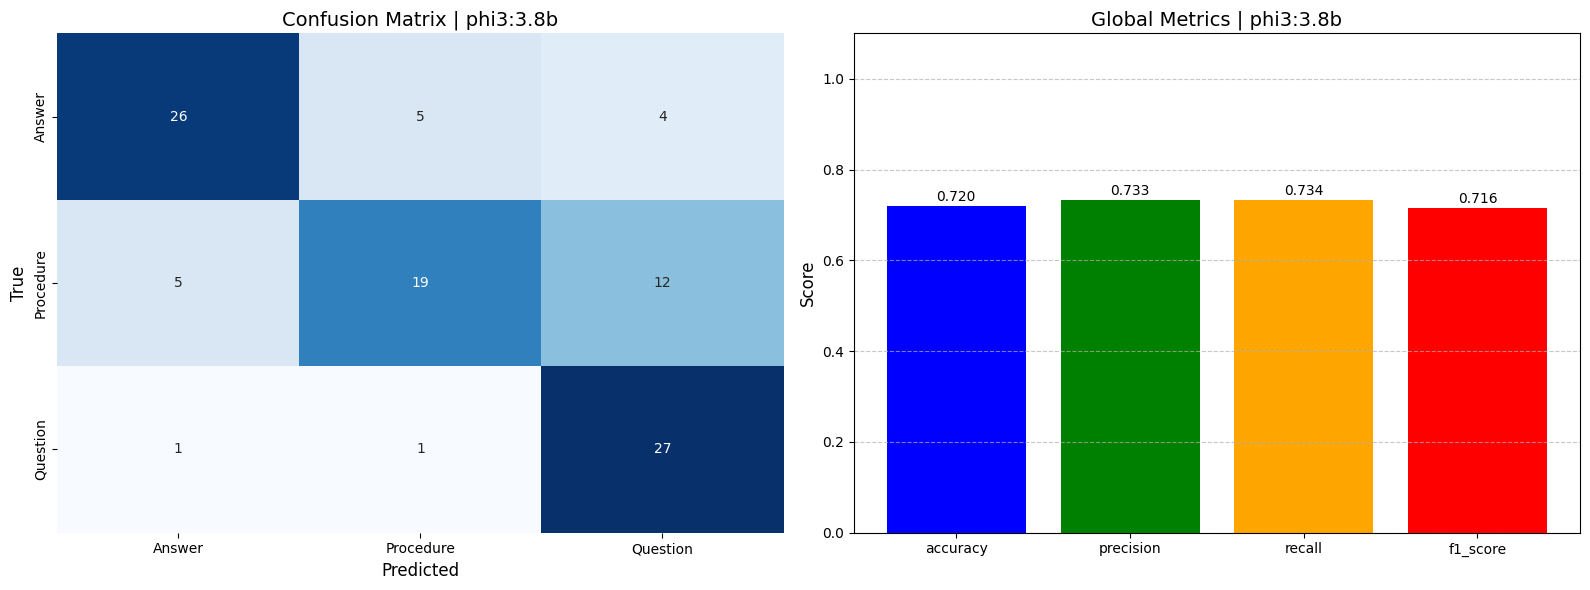

ELAPSED TIME CLASSIFYING FOR MODEL phi3:14b is 37.36


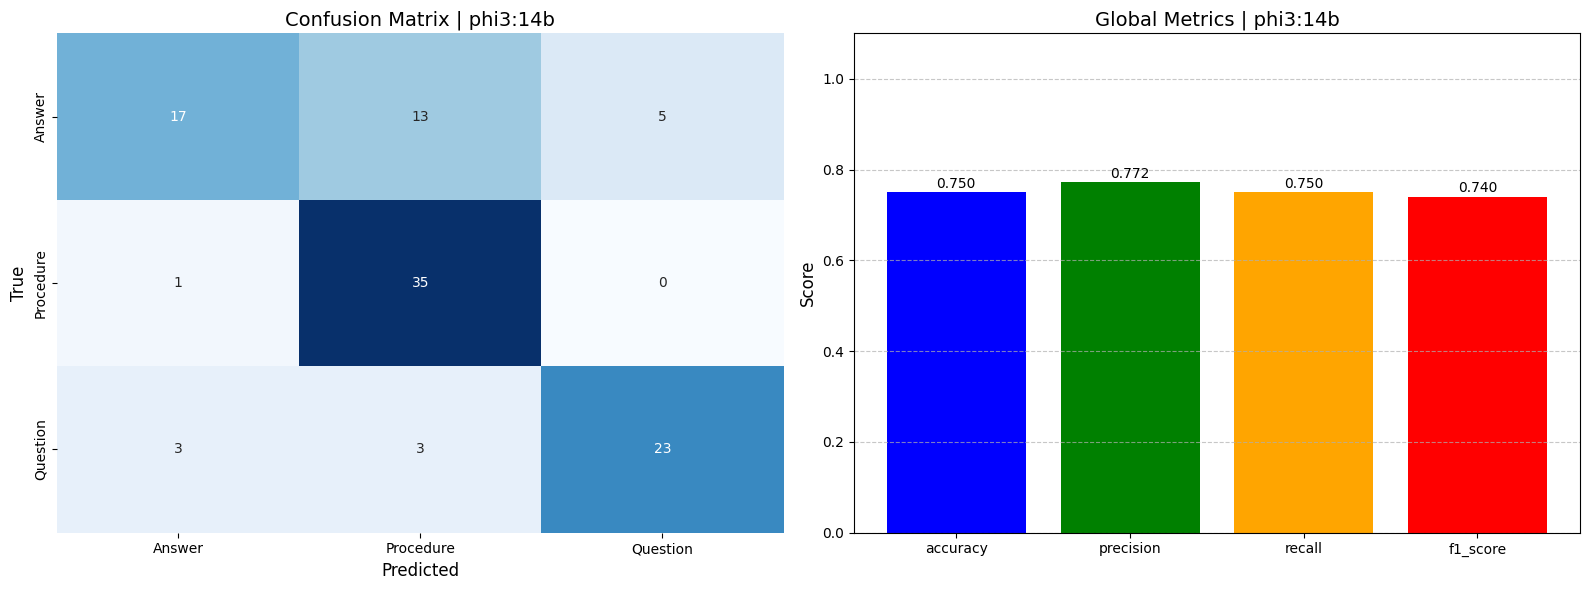

ELAPSED TIME CLASSIFYING FOR MODEL phi4 is 40.53


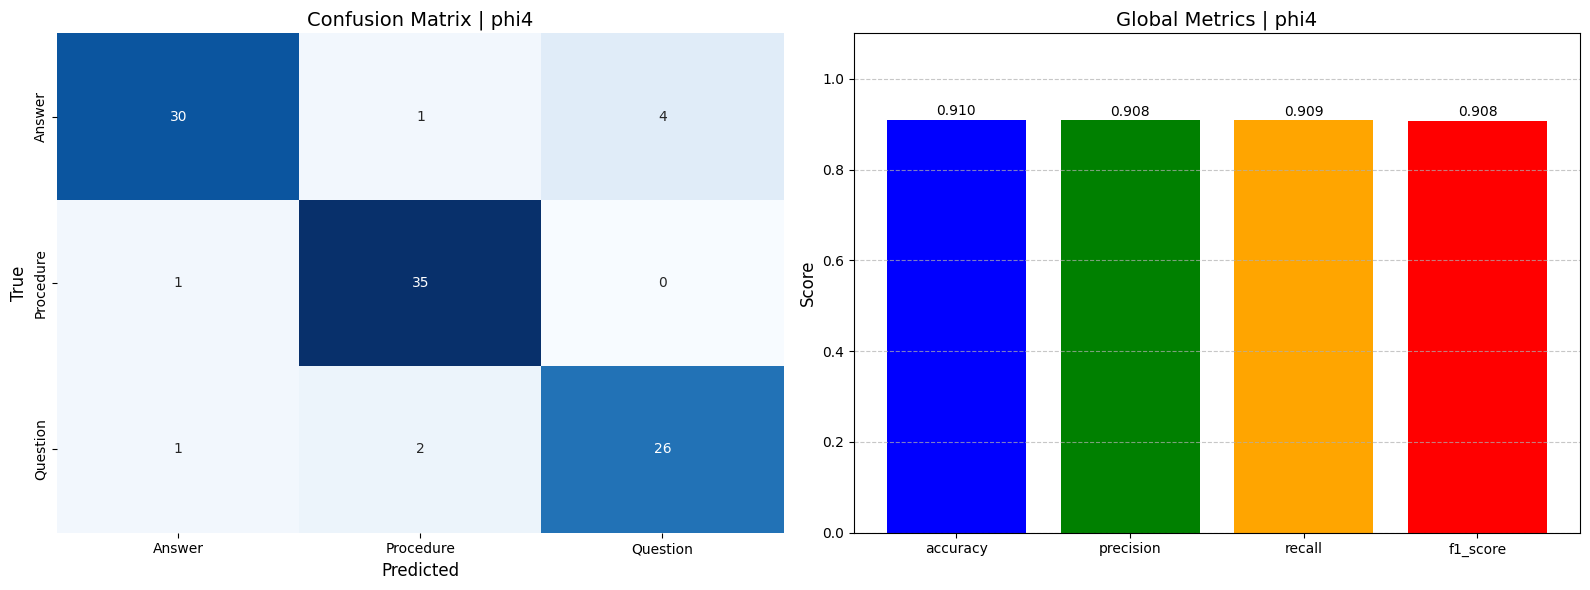

ELAPSED TIME CLASSIFYING FOR MODEL qwen2:0.5b is 19.21


/mnt/sdb1/home/aacastro/Alejandro/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/sdb1/home/aacastro/Alejandro/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/sdb1/home/aacastro/Alejandro/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

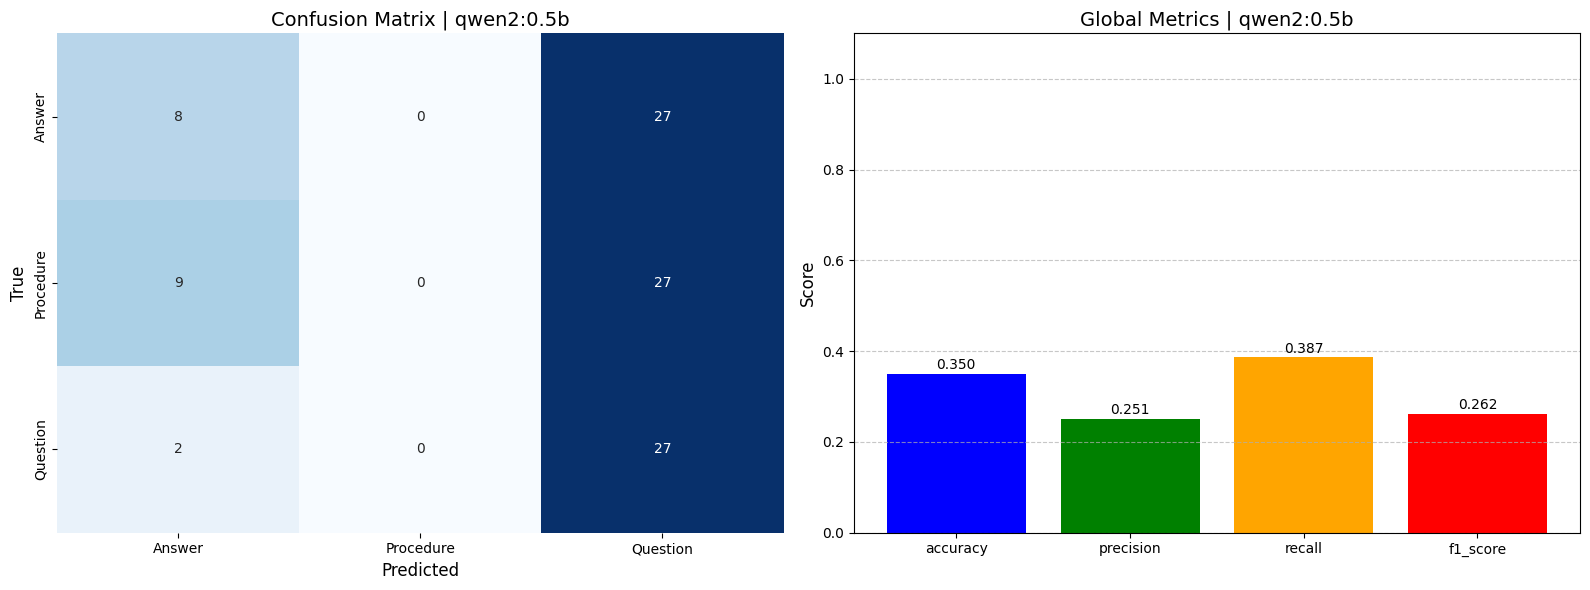

ELAPSED TIME CLASSIFYING FOR MODEL qwen2:1.5b is 22.5


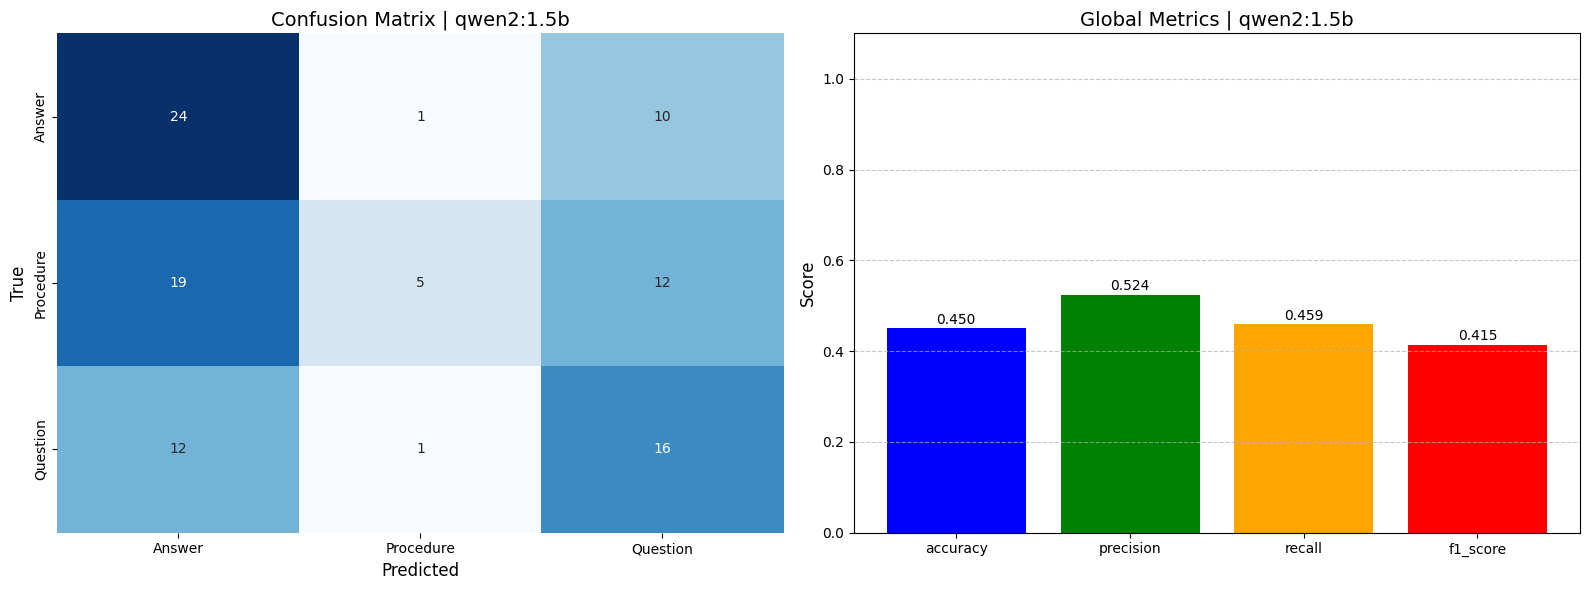

ELAPSED TIME CLASSIFYING FOR MODEL qwen2:7b is 30.18


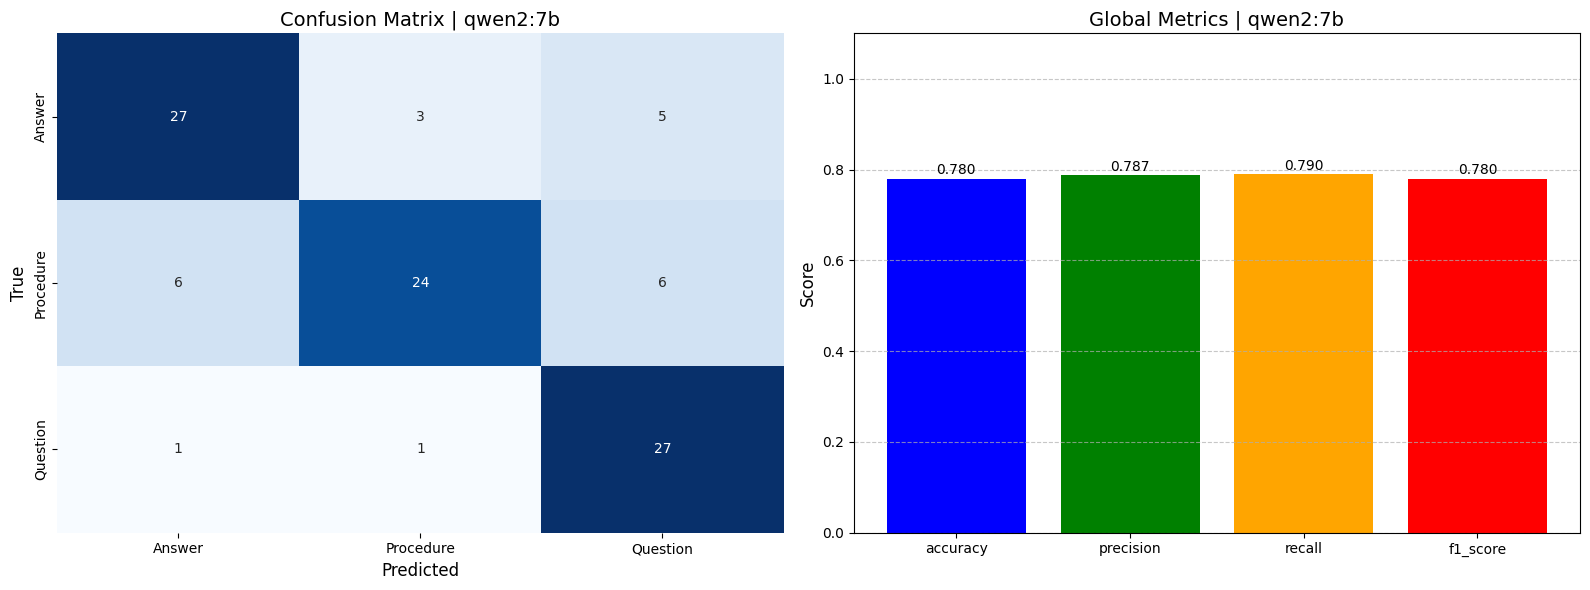

ELAPSED TIME CLASSIFYING FOR MODEL qwen2.5:0.5b is 19.46


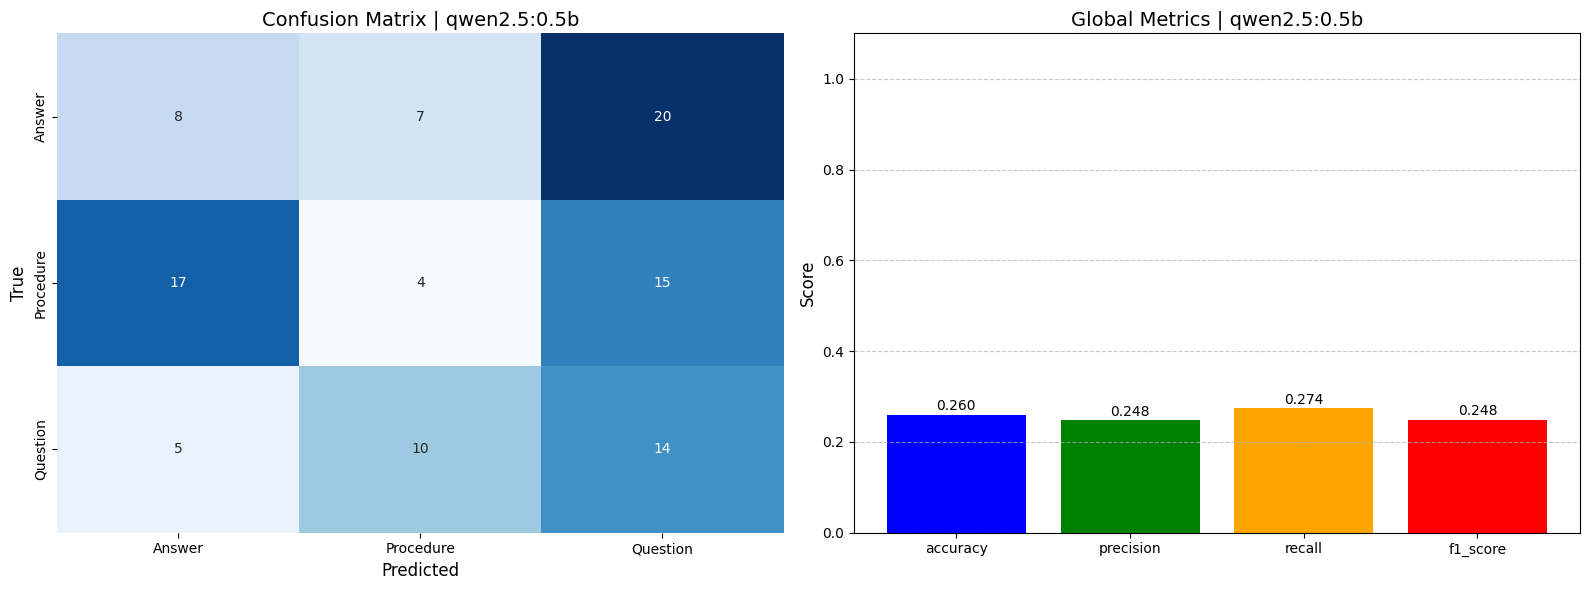

ELAPSED TIME CLASSIFYING FOR MODEL qwen2.5:1.5b is 19.54


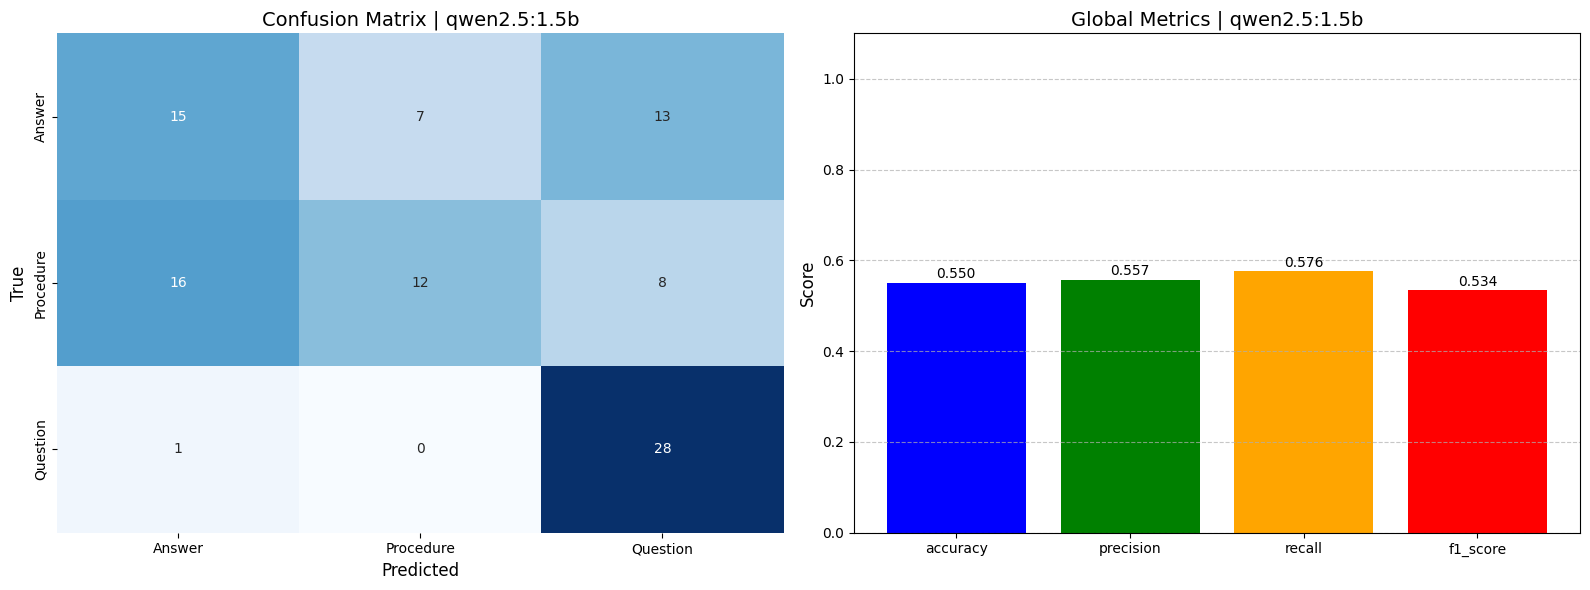

ELAPSED TIME CLASSIFYING FOR MODEL qwen2.5:3b is 24.62


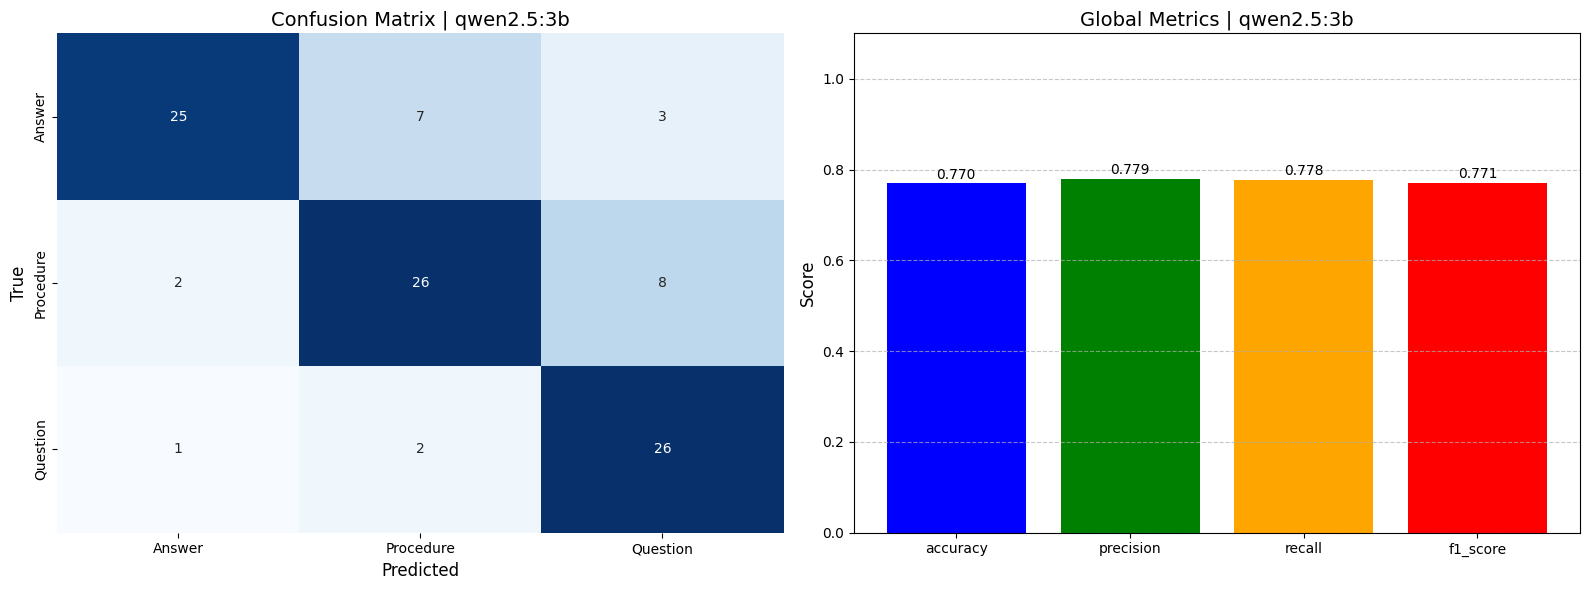

ELAPSED TIME CLASSIFYING FOR MODEL qwen2.5:7b is 34.31


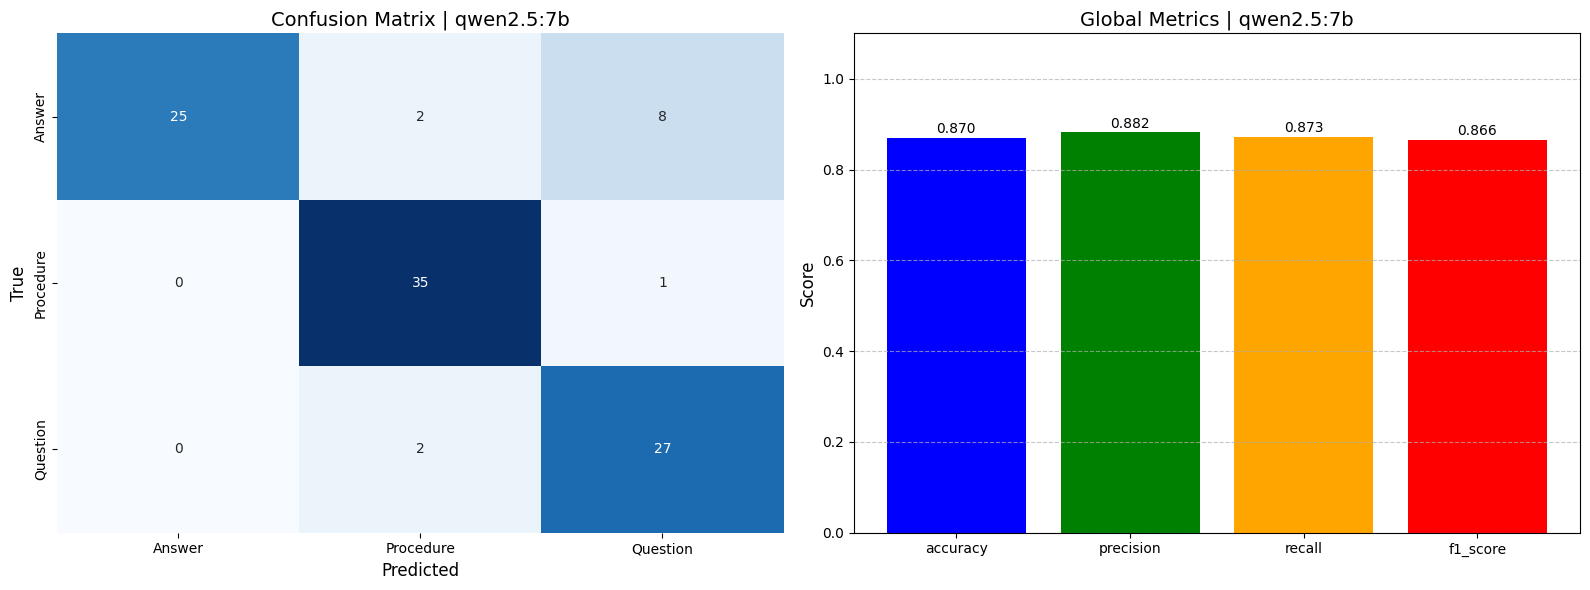

ELAPSED TIME CLASSIFYING FOR MODEL qwen2.5:14b is 41.4


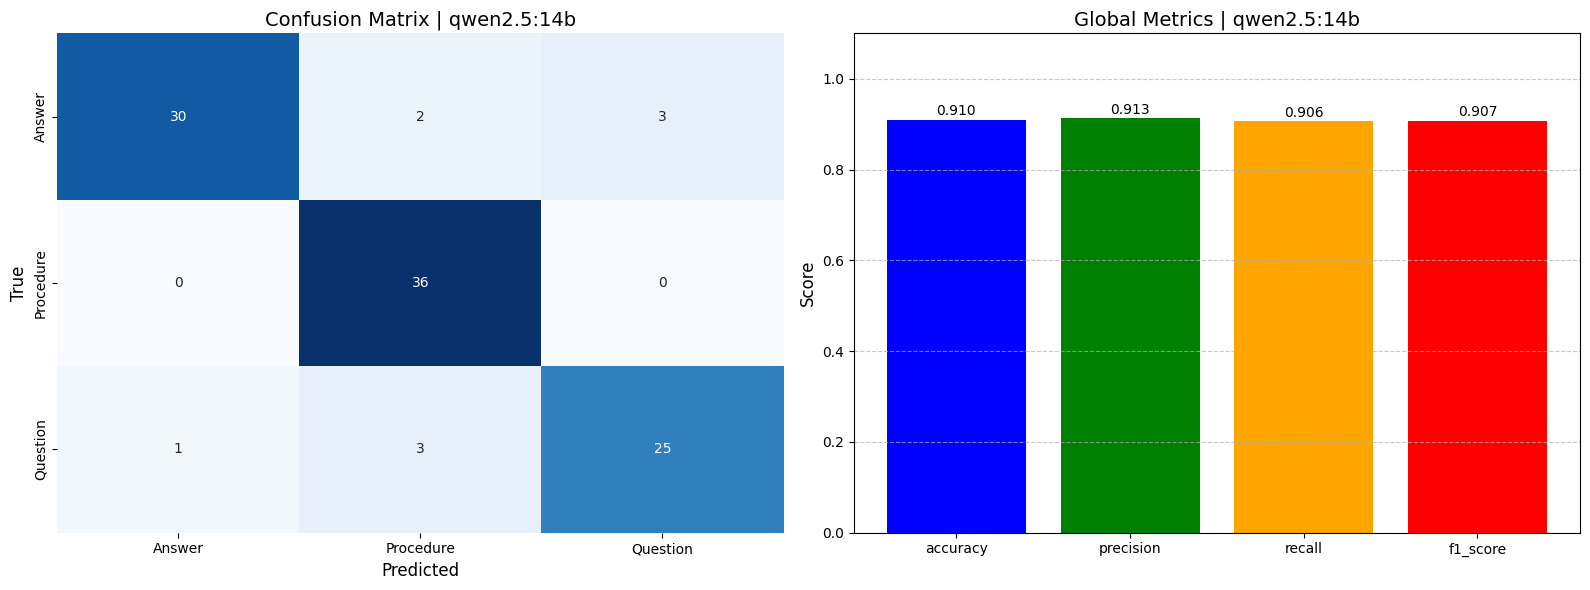

ELAPSED TIME CLASSIFYING FOR MODEL gemma:2b is 24.06


/mnt/sdb1/home/aacastro/Alejandro/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/sdb1/home/aacastro/Alejandro/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/sdb1/home/aacastro/Alejandro/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

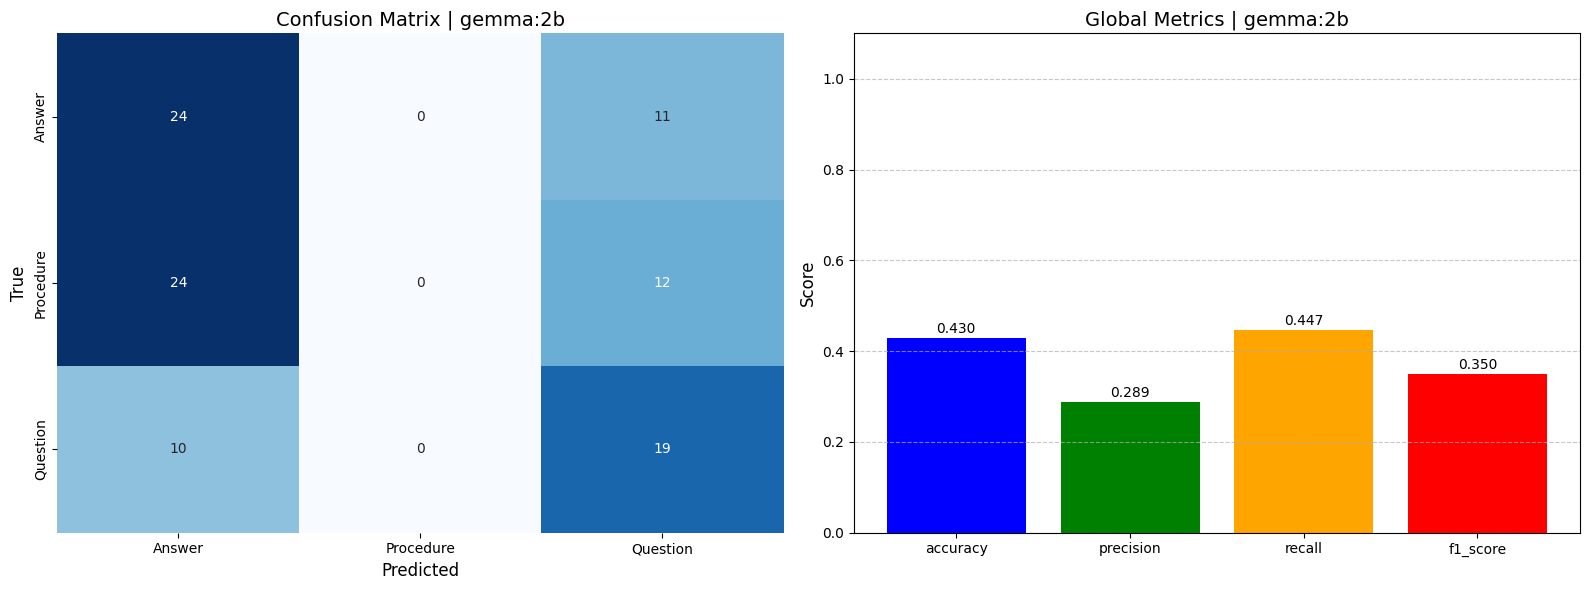

ELAPSED TIME CLASSIFYING FOR MODEL gemma:7b is 36.25


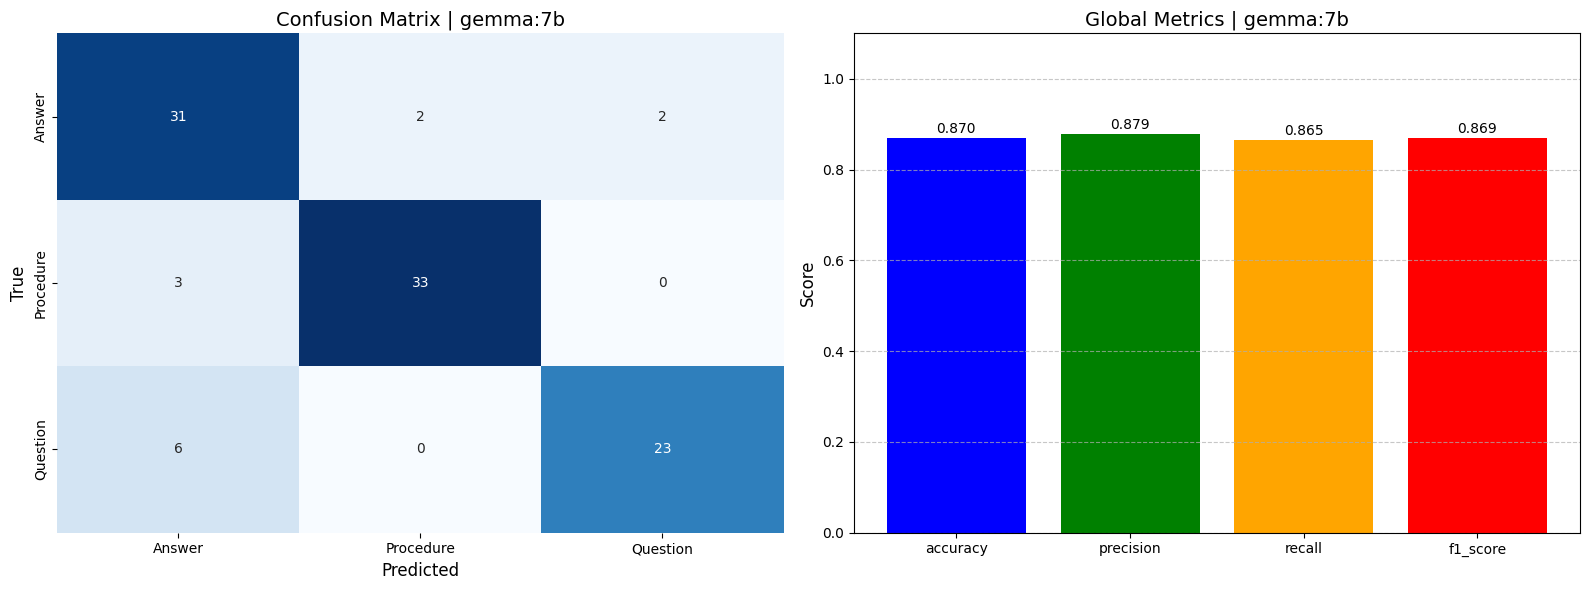

ELAPSED TIME CLASSIFYING FOR MODEL gemma2:2b is 34.04


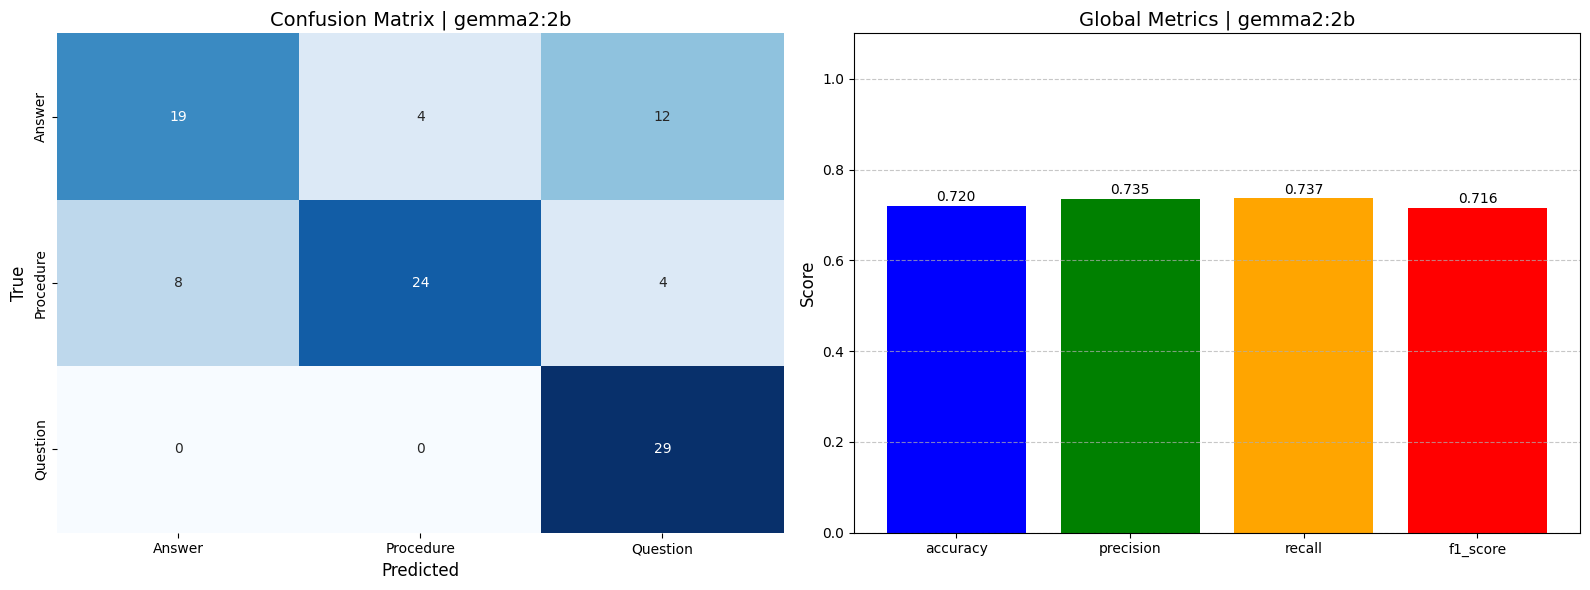

ELAPSED TIME CLASSIFYING FOR MODEL gemma2:9b is 42.6


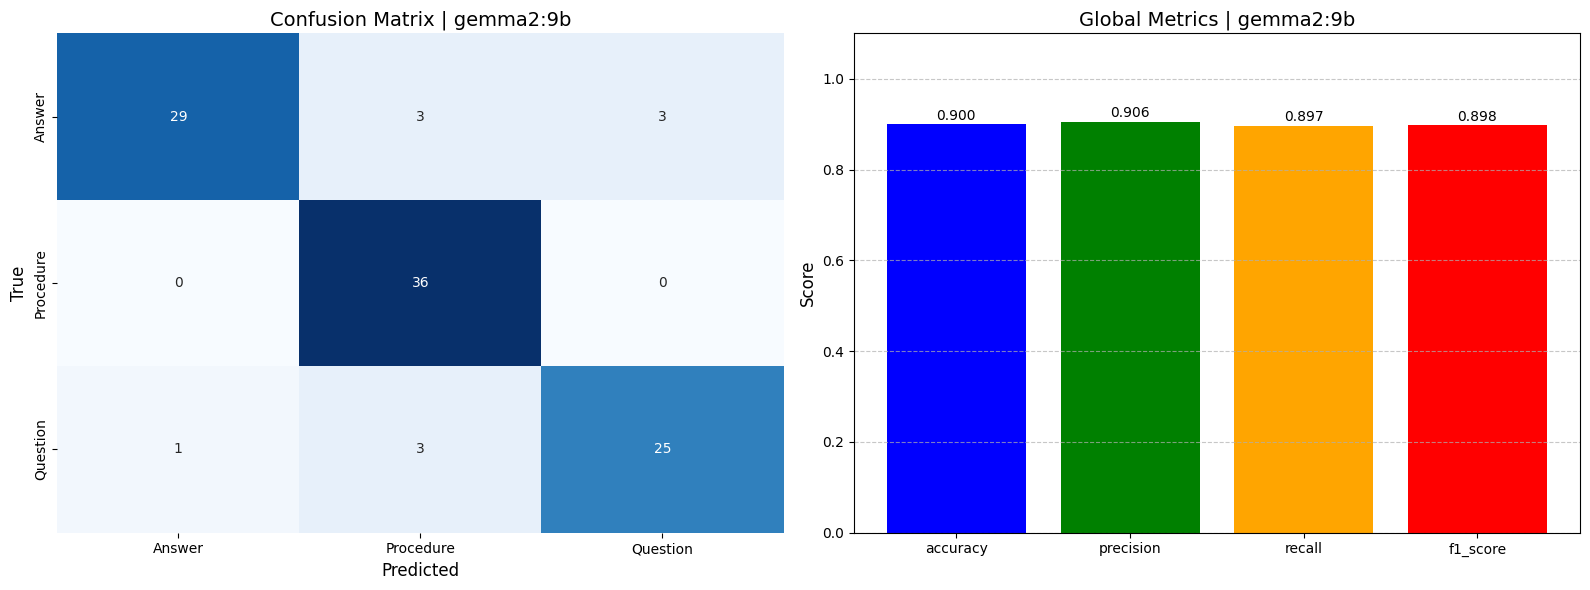

ELAPSED TIME CLASSIFYING FOR MODEL mistral is 27.93


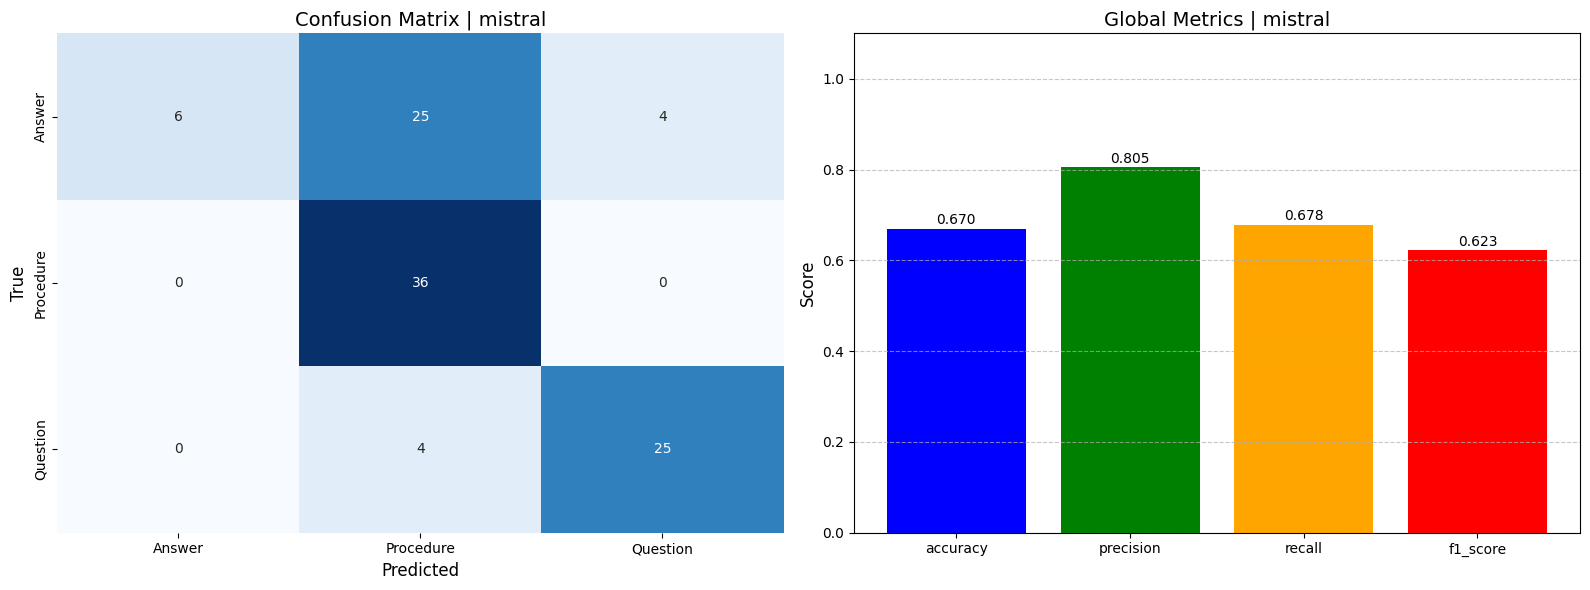

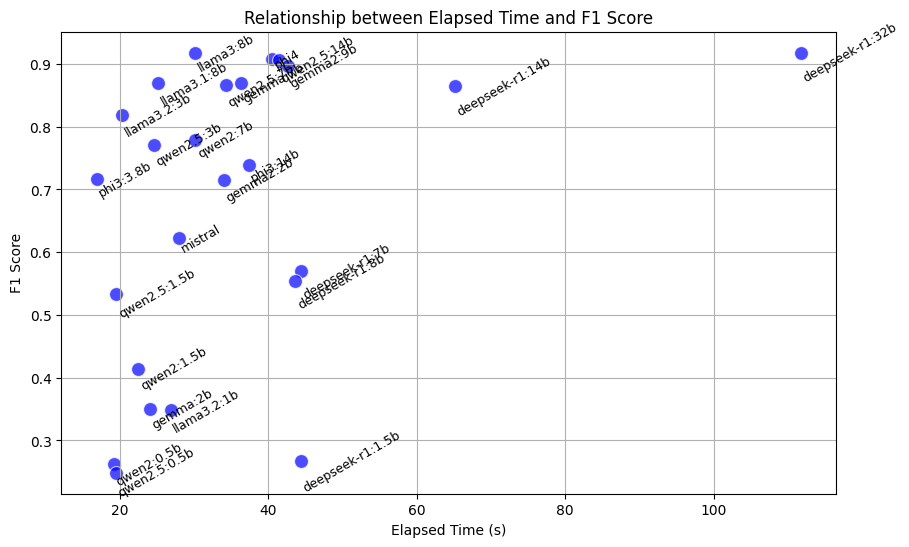

In [3]:
for model_name in models:

    results_path = f"/home/aacastro/Alejandro/ACA_MultichanelAI_2025/src/TEXT/Q_A/model_results/"

    try:
        # Create an instance of the base classifier and classify
        classifier = Classifier_QA(model_name)
        start_time = time.time()
        classified_df = classifier.annotate_question_answer_pairs(classifier.classify_interventions(pd.read_csv(labeled_data)))
        elapsed_time = round(time.time() - start_time, 2)

        print(f"ELAPSED TIME CLASSIFYING FOR MODEL {model_name} is {elapsed_time}")

        # Create an instance of the evaluation class and get results
        evaluator = ModelMetrics(model_name=model_name, results_path=results_path)
        metrics = evaluator.get_results(classified_df)

        row_data = {
            "model_name": model_name,
            "elapsed_time": elapsed_time,
            **metrics}
        
        results_df = pd.concat([results_df, pd.DataFrame([row_data])], ignore_index=True)

    except Exception as e:
        print(f"An error occurred with model {model_name}: {e}")
        continue

results_df.to_csv("/home/aacastro/Alejandro/ACA_MultichanelAI_2025/src/TEXT/Q_A/model_results/models_metrics.csv", index=False)
evaluator.plot_f1_vs_time_all_models(results_df)